In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 


In [2]:
def load_data():
    url='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html=pd.read_html(url,header=0)
    df=html[0]
    return df

In [8]:
df= load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [12]:
sector_unque=df['GICS Sector'].unique()
sector_unque

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [14]:
len(sector_unque)

11

In [16]:
sector=df.groupby('GICS Sector')


In [17]:
#shows first company for each of the sectors
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,ADM,ADM,reports,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [18]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  26.0  1.094660e+06  521922.541174  18926.0  752994.75   
Consumer Discretionary  58.0  8.495980e+05  458494.034190  27419.0  750418.50   
Consumer Staples        33.0  4.185174e+05  583783.310585   7084.0   24545.00   
Energy                  21.0  8.548145e+05  635563.925529   4447.0  101778.00   
Financials              66.0  6.369112e+05  537329.687765   4962.0   71386.25   
Health Care             64.0  8.222880e+05  531850.572835   1800.0  312903.00   
Industrials             73.0  6.736877e+05  585966.514840   4281.0   77360.00   
Information Technology  74.0  9.207505e+05  510627.880086   2488.0  754287.50   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             31.0  9.221912e+05  348534.075210  34903.0  831190.50   
Utilities               29.0  8.402204e+05  467422.045064   4904.0  731802.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1129179.0  1532807.75  1754301.0  
Consumer Discretionary   918562.5  1120374.00  1590895.0  
Consumer Staples          77476.0   865752.00  1679273.0  
Energy                  1035002.0  1506307.00  1841666.0  
Financials               739974.5  1118437.00  1601712.0  
Health Care              880632.0  1100020.50  1821825.0  
Industrials              746515.0  1067701.00  1783180.0  
Information Technology   949462.5  1349367.25  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              920522.0  1058634.00  1705696.0  
Utilities                874761.0  1047862.00  1868275.0

In [19]:
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
13,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
19,ALGN,Align Technology,reports,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
...,...,...,...,...,...,...,...,...,...
473,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
487,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [20]:
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [ ]:
#function to download stock price data
data = yf.download(
    tickers=list(df.Symbol),
    #all the datd in the table
    
    period= "ytd", #ytd=year to date ie beginning of that year to the current date
    #valid periods-> 1d,5d,1mo,3mo,6mo,1y,2y,10y,ytd,max
    interval= "1d",
    
    group_by= 'ticker',
    
    auto_adjust = True,
    prepost = True,
    threads = True,
    proxy = None
        
)

In [28]:
data

HLT                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2022-01-03  155.949997  157.149994  152.750000  154.479996  1712700   
2022-01-04  157.490005  159.210007  155.949997  155.960007  2043100   
2022-01-05  156.220001  156.460007  151.779999  151.800003  1339900   
2022-01-06  152.240005  153.600006  150.910004  152.179993  1782200   
2022-01-07  152.570007  155.029999  151.970001  152.000000  2040200   
...                ...         ...         ...         ...      ...   
2022-08-22  132.199997  133.820007  131.229996  131.580002  1472900   
2022-08-23  132.270004  133.979996  132.080002  132.279999  1242000   
2022-08-24  132.039993  134.300003  132.039993  133.300003  1030200   
2022-08-25  134.330002  136.199997  134.149994  136.080002  1046400   
2022-08-26  136.020004  136.589996  132.759995  133.263901   352759   

                    HD                                               ...  \
                  Open        High         Low       Close   Volume  ...   
Date                                                                 ...   
2022-01-03  416.570007  417.839996  403.260010  408.640015  3715700  ...   
2022-01-04  408.640015  413.609985  408.190002  412.839996  3266500  ...   
2022-01-05  414.000000  414.220001  406.809998  407.239990  4443200  ...   
2022-01-06  408.559998  409.070007  403.019989  405.760010  3315100  ...   
2022-01-07  403.359985  404.089996  392.880005  393.609985  4520700  ...   
...                ...         ...         ...         ...      ...  ...   
2022-08-22  318.089996  319.739990  311.709991  312.209991  3144200  ...   
2022-08-23  311.209991  311.519989  305.640015  306.899994  3317500  ...   
2022-08-24  305.049988  309.980011  303.549988  308.109985  2495600  ...   
2022-08-25  308.640015  309.959991  305.829987  309.779999  2528000  ...   
2022-08-26  310.299988  311.505005  301.799988  302.399994  1283590  ...   

                   ALL                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2022-01-03  116.921597  118.867807  116.544273  117.437935  1924600   
2022-01-04  118.569924  120.635285  118.162805  120.277817  1878400   
2022-01-05  120.933174  122.134660  120.128875  120.168587  1840100   
2022-01-06  122.065157  122.899244  120.367188  121.538887  1510900   
2022-01-07  121.945995  125.312145  121.290642  125.063904  2314100   
...                ...         ...         ...         ...      ...   
2022-08-22  128.919998  128.919998  125.290001  125.550003  1474100   
2022-08-23  125.669998  126.370003  125.260002  125.500000  1445400   
2022-08-24  125.410004  127.349998  125.099998  126.959999  1295400   
2022-08-25  127.180000  128.070007  126.169998  128.000000   912200   
2022-08-26  128.229996  128.330002  125.894997  126.129997   354015   

                   UHS                                              
                  Open        High         Low       Close  Volume  
Date                                                                
2022-01-03  129.970249  131.967487  129.520874  131.837677  569400  
2022-01-04  132.117288  135.812175  132.017420  133.635193  570900  
2022-01-05  132.716453  137.529804  132.716453  133.615219  664100  
2022-01-06  133.814936  134.653772  130.389681  130.799103  669000  
2022-01-07  130.799112  133.385547  130.649325  131.787750  757300  
...                ...         ...         ...         ...     ...  
2022-08-22  106.610001  107.379997  105.089996  105.209999  432600  
2022-08-23  105.449997  106.300003  103.529999  103.589996  404100  
2022-08-24  104.930000  104.930000  103.019997  104.610001  878300  
2022-08-25  105.199997  106.690002  104.699997  105.790001  451900  
2022-08-26  105.570000  105.919998  103.440002  103.570000   96074 

[**************************************170%****************************************]  854 of 503 completed

In [31]:
data['AAPL']

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,177.097166,182.126359,176.977666,181.259933,104487900
2022-01-04,181.877375,182.186095,178.381831,178.959442,99310400
2022-01-05,178.869833,179.427523,173.920313,174.199158,94537600
2022-01-06,171.988296,174.577587,170.932666,171.291183,96904000
2022-01-07,172.177529,173.422378,170.325193,171.460495,86709100
...,...,...,...,...,...
2022-08-22,169.690002,169.860001,167.139999,167.570007,69026800
2022-08-23,167.080002,168.710007,166.649994,167.229996,54147100
2022-08-24,167.320007,168.110001,166.250000,167.529999,53841500


In [46]:
new_df= pd.DataFrame(data['AAPL'].Close)
new_df['Date'] = new_df.index
new_df

,Close,Date
Date,,
2022-01-03,181.259933,2022-01-03
2022-01-04,178.959442,2022-01-04
2022-01-05,174.199158,2022-01-05
2022-01-06,171.291183,2022-01-06
2022-01-07,171.460495,2022-01-07
...,...,...
2022-08-22,167.570007,2022-08-22
2022-08-23,167.229996,2022-08-23
2022-08-24,167.529999,2022-08-24


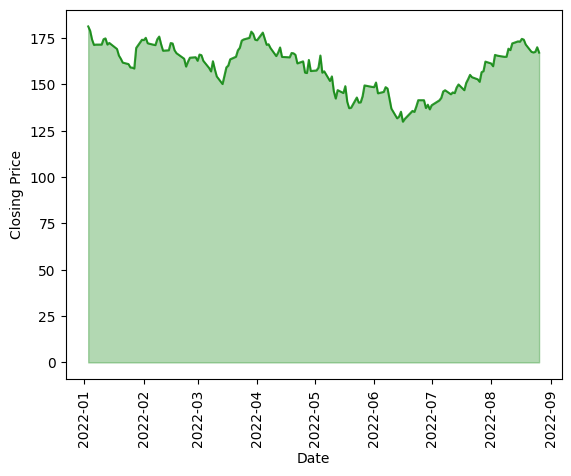

In [44]:
plt.plot(new_df.Date, new_df.Close,color="green",alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.fill_between(new_df.Date, new_df.Close,color="green",alpha=0.3)

In [52]:
def price_plot(symb):
    df= pd.DataFrame(data[symb].Close)
    df['Date']=df.index
    
    plt.plot(df.Date, df.Close,color="green",alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=90)
    plt.fill_between(df.Date, df.Close,color="green",alpha=0.3)
    plt.title(symb, fontweight='bold')
    return plt.show()
        
        
    

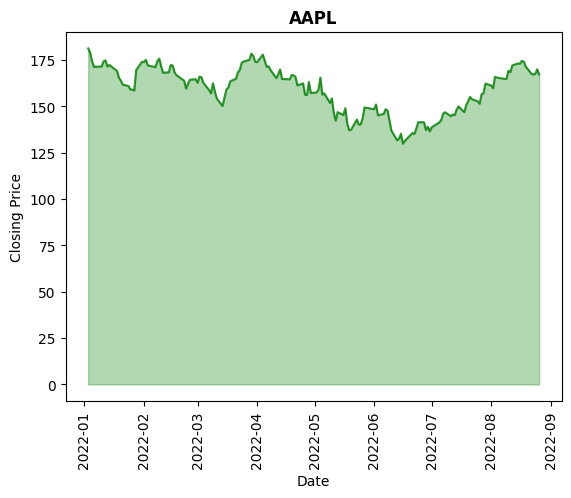

In [50]:
price_plot('AAPL')

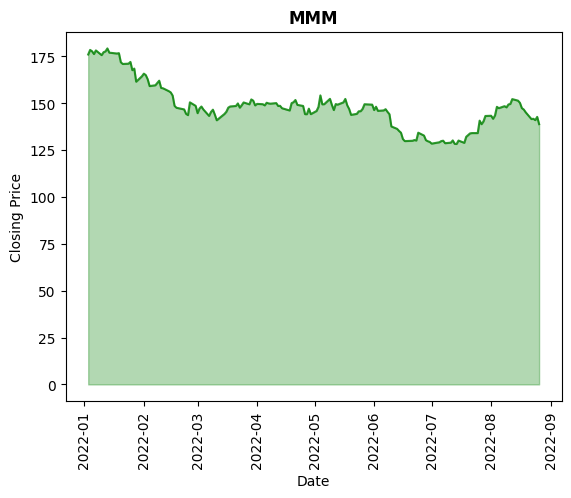

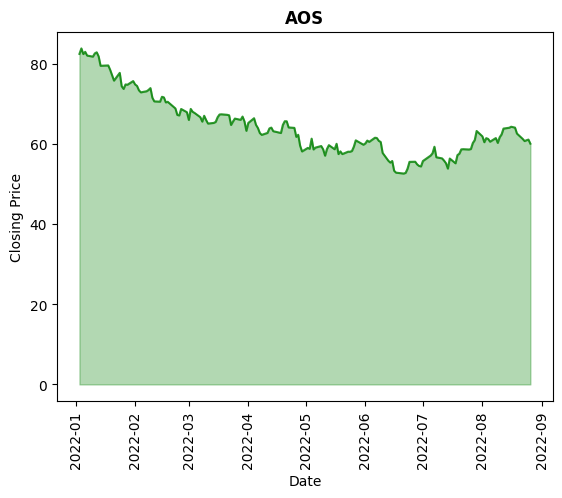

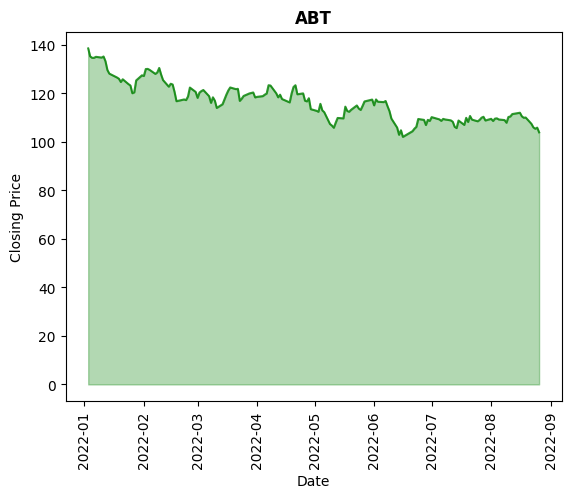

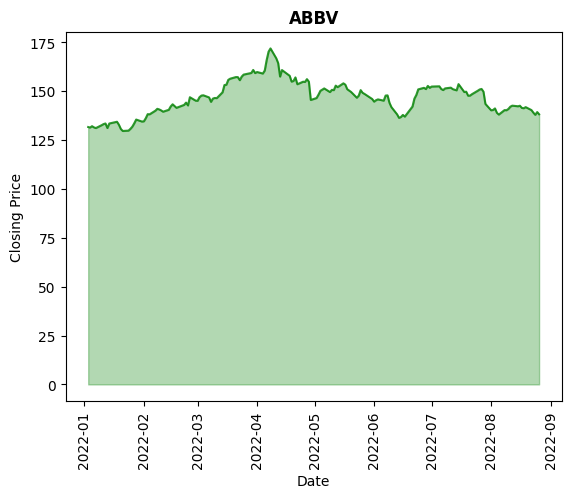

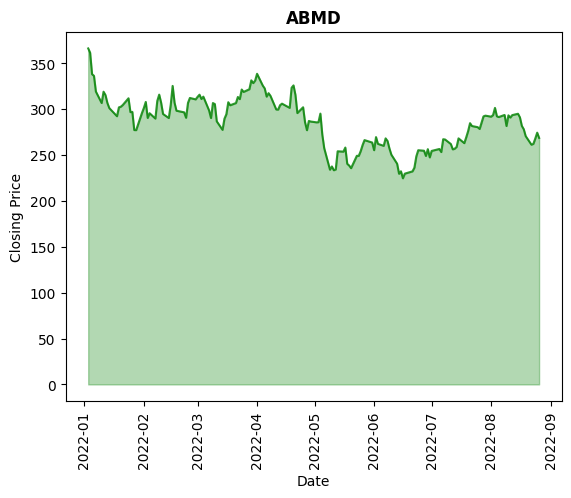

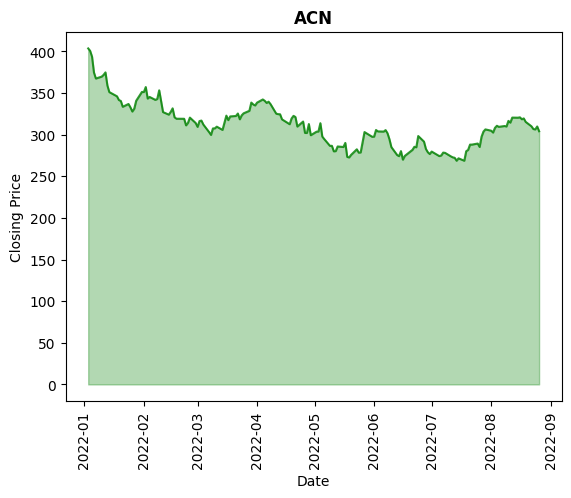

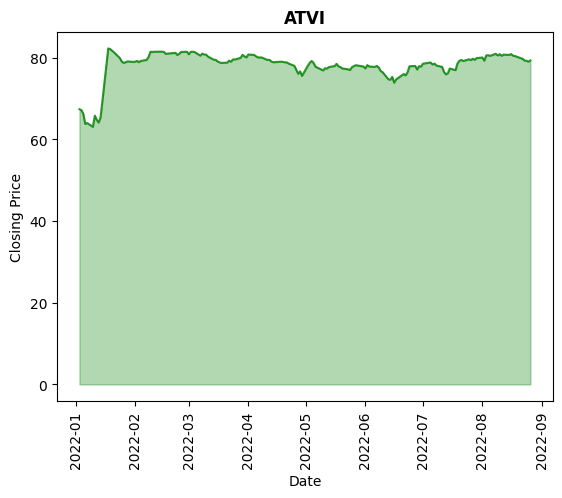

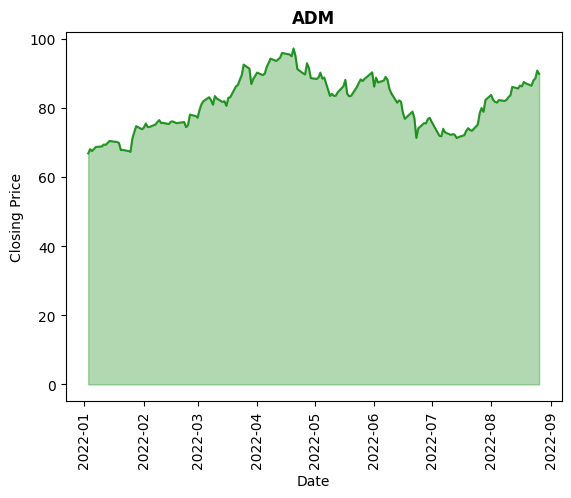

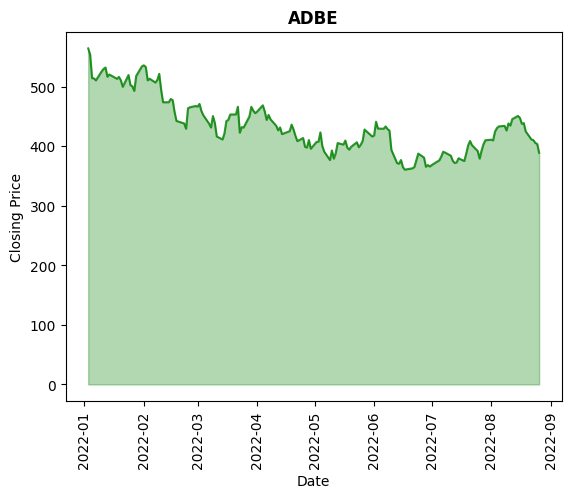

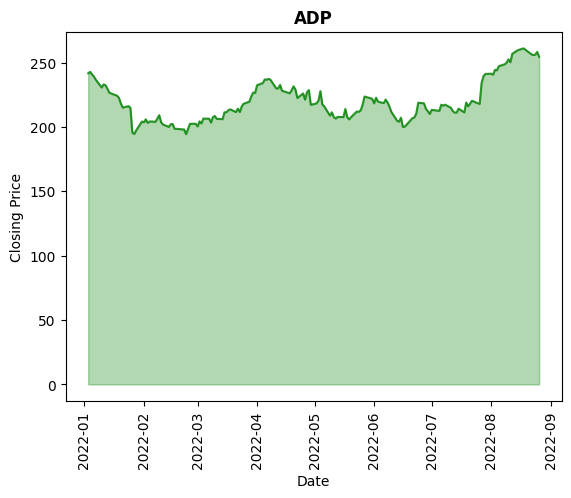

In [53]:
for i in list(df.Symbol)[:10]:
    price_plot(i)